In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
data=pd.read_csv("tips (data for regression problem).csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [208]:
data.shape

(244, 7)

In [209]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [211]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [212]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [213]:
x=data.drop(columns=["tip"])
y=data.tip


In [214]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Let's gain some insights by plotting a few graphs.

<Axes: xlabel='day', ylabel='tip'>

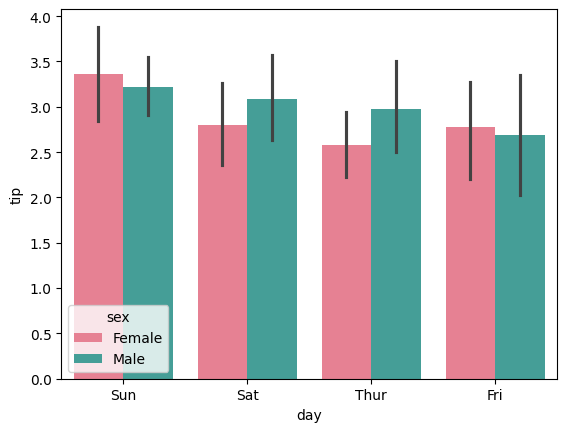

In [215]:
sns.barplot(data=data,x="day",y="tip",palette="husl",hue="sex")

<Axes: xlabel='day', ylabel='tip'>

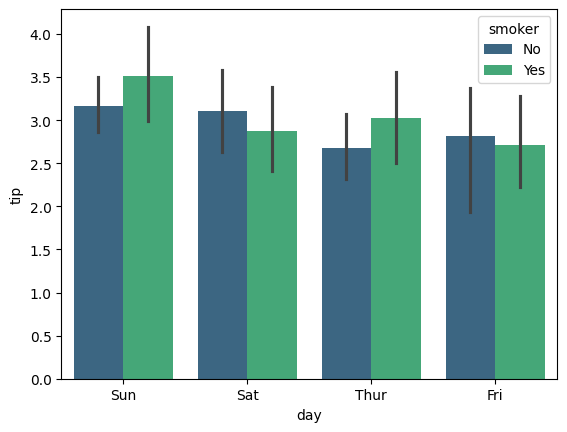

In [216]:
sns.barplot(data=data,x="day",y="tip",palette="viridis",hue="smoker")

<Axes: xlabel='day', ylabel='tip'>

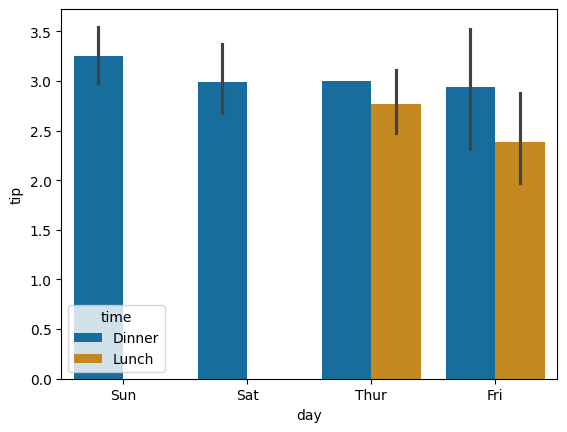

In [217]:
sns.barplot(data=data,x="day",y="tip",palette="colorblind",hue="time")

<Axes: xlabel='smoker', ylabel='tip'>

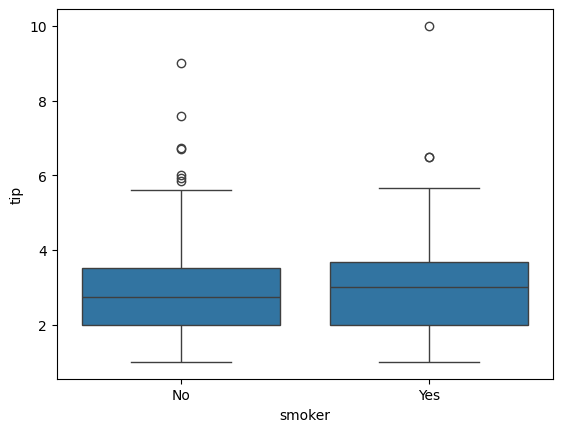

In [218]:
sns.boxplot(data=data,x="smoker",y="tip")

<Axes: xlabel='sex', ylabel='tip'>

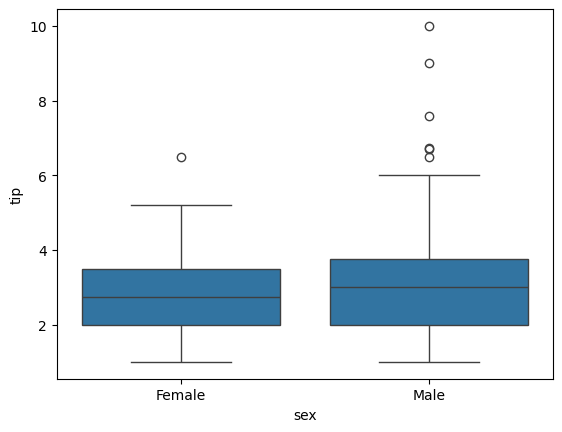

In [219]:
sns.boxplot(data=data,x="sex",y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

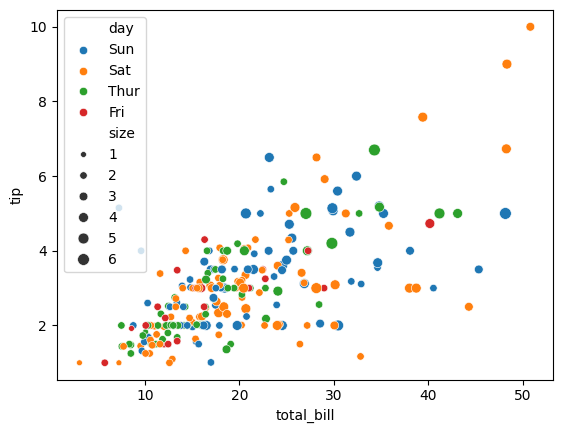

In [220]:
sns.scatterplot(data=data,x="total_bill",y="tip",hue="day",size="size",color="blue")

<Axes: xlabel='day', ylabel='tip'>

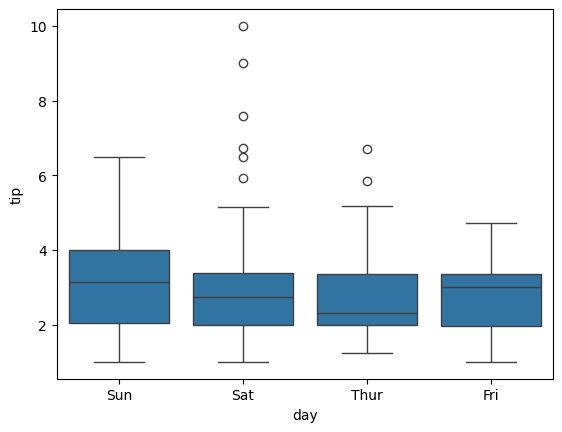

In [221]:
sns.boxplot(data=data,x="day",y="tip")

Conclusions from plots  
1] Tip majorly depends on total bill and size  
2] Exceptional high tips are mainly paid by men.  
3] Majorly tips are paid on weekends (sat and sun)

In [222]:
#Split the data into training and testing sets before preprocessing to prevent data leakage.
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y,train_size=0.8,random_state=7)

In [223]:
x["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [224]:
x["smoker"].unique()

array(['No', 'Yes'], dtype=object)

In [225]:
x["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

Apply one-hot encoding to columns with two unique values, dropping one column to prevent multicollinearity.

In [226]:
x_train = pd.get_dummies(x_train, columns=["sex","smoker","time"],drop_first=True)
x_valid = pd.get_dummies(x_valid, columns=["sex","smoker","time"],drop_first=True)

In [227]:
# Convert boolean columns generated due to above code in x_train and x_valid to integers
x_train = x_train.astype({col: 'int' for col in x_train.select_dtypes('bool').columns})
x_valid = x_valid.astype({col: 'int' for col in x_valid.select_dtypes('bool').columns})

In [228]:
x.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [250]:
# Import required library
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Transform 'day' column in training and validation sets
x_train["day"] = le.fit_transform(x_train["day"])
x_valid["day"] = le.transform(x_valid["day"])


In [230]:
x_train.head()

,total_bill,day,size,sex_Male,smoker_Yes,time_Lunch
66,16.45,1,2,0,0,0
208,24.27,1,2,1,1,0
193,15.48,3,2,1,1,1
77,27.20,3,4,1,0,1
96,27.28,0,2,1,1,0


now all cols have numerical data, so we can train our model

### 1]Linear Regression

### STANDARD FORMAT
1] Initialize the model  
2] Train the model on the training data  
3] Make predictions on the validation data  
4] Evaluate the model using MSE and R²

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the model
linear = LinearRegression()
linear.fit(x_train, y_train)

# Make predictions and evaluate the model
ypred_linear = linear.predict(x_valid)
mse_linear = mean_squared_error(y_valid, ypred_linear)
r2_linear = r2_score(y_valid, ypred_linear)

# Display results
print("MSE for Linear Regression =", mse_linear)
print("R² for Linear Regression =", r2_linear)


MSE for Linear Regression = 0.8877758961150215
R² for Linear Regression = 0.48253122496539935


### 2]Ridge Regularizarion

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the model
linear = LinearRegression()
linear.fit(x_train, y_train)

# Make predictions
ypred_linear = linear.predict(x_valid)

# Evaluate the model
mse_linear = mean_squared_error(y_valid, ypred_linear)
r2_linear = r2_score(y_valid, ypred_linear)

# Display results
print("MSE for Linear Regression =", mse_linear)
print("R² for Linear Regression =", r2_linear)

MSE for Linear Regression = 0.8877758961150215
R² for Linear Regression = 0.48253122496539935


### 3]Lasso Regularization

In [233]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(x_valid)

# Evaluate the model
mse_lasso = mean_squared_error(y_valid, y_pred_lasso)
r2_lasso = r2_score(y_valid, y_pred_lasso)

# Display results
print("mse for lasso = ", mse_lasso)
print("r2 for lasso = ", r2_lasso)

mse for lasso =  0.8897031007429531
r2 for lasso =  0.4814078916755219


### 4] Decision tree

In [234]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(x_train, y_train)

# Make predictions
y_pred_dectree = tree_model.predict(x_valid)

# Evaluate the model
mse_dectree = mean_squared_error(y_valid, y_pred_dectree)
r2_dectree = r2_score(y_valid, y_pred_dectree)

# Display results
print("MSE for Decision Tree =", mse_dectree)
print("R^2 for Decision Tree =", r2_dectree)

MSE for Decision Tree = 0.81484113883199
R^2 for Decision Tree = 0.5250435973713814


### 5] Random Forest

In [235]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions and calculate metrics
y_pred_rf = rf_model.predict(x_valid)
mse_rf = mean_squared_error(y_valid, y_pred_rf)
r2_rf = r2_score(y_valid, y_pred_rf)

# Print performance metrics
print("MSE for Random Forest =", mse_rf)
print("R^2 for Random Forest =", r2_rf)



MSE for Random Forest = 0.678898752364078
R^2 for Random Forest = 0.6042819958328288


### 6] SVM

In [236]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(x_train, y_train)

y_pred_svr = svr_model.predict(x_valid)
mse_svr = mean_squared_error(y_valid, y_pred_svr)
r2_svr = r2_score(y_valid, y_pred_svr)

print("MSE for SVM =", mse_svr)
print("R^2 for SVM =", r2_svr)


MSE for SVM = 0.890718194009642
R^2 for SVM = 0.48081621187033896


### 7] KNN

In [237]:
# Import necessary libraries for evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Initialize K-Nearest Neighbors Regressor with 5 neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(x_train, y_train)

# Predict on the training data
y_pred_knn = knn_model.predict(x_train)

# Calculate Mean Squared Error and R-squared for the predictions
mse_knn = mean_squared_error(y_train, y_pred_knn)
r2_knn = r2_score(y_train, y_pred_knn)

# Print the performance metrics
print("MSE for KNN =", mse_knn)
print("R^2 for KNN =", r2_knn)



MSE for KNN = 0.9745640615384616
R^2 for KNN = 0.5005348551688764


Tree-based models provide the `feature_importances_` attribute, which shows each feature's contribution.  
Let's plot the feature importance for both Decision Tree and Random Forest models.

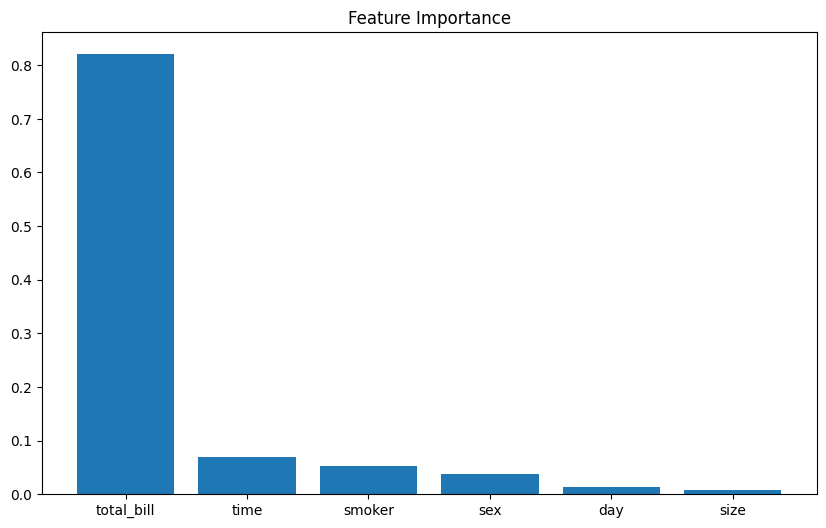

In [238]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for the Random Forest model
feature_importances = rf_model.feature_importances_
features = x.columns
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), features[indices])
plt.show()

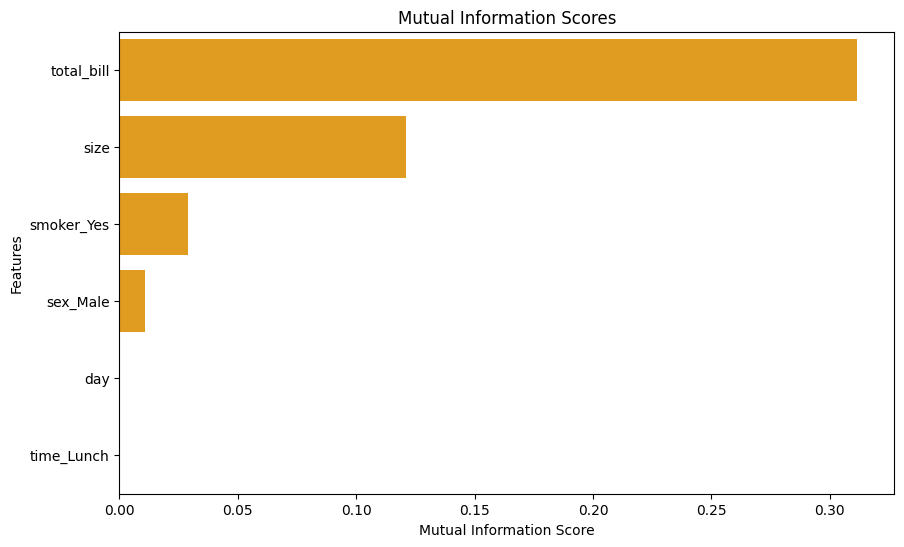

In [239]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Mutual Information", y="Feature", data=mi_df, color="orange")

# Add title and labels
plt.title("Mutual Information Scores")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")

# Display the plot
plt.show()

Let's utilize the `mutual_info_score` feature from `sklearn`.

In [240]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(x_train, y_train)

# Display scores in a DataFrame
mi_df = pd.DataFrame({'Feature': x_train.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


      Feature  Mutual Information
0  total_bill            0.314336
2        size            0.112392
3    sex_Male            0.005535
1         day            0.000000
4  smoker_Yes            0.000000
5  time_Lunch            0.000000


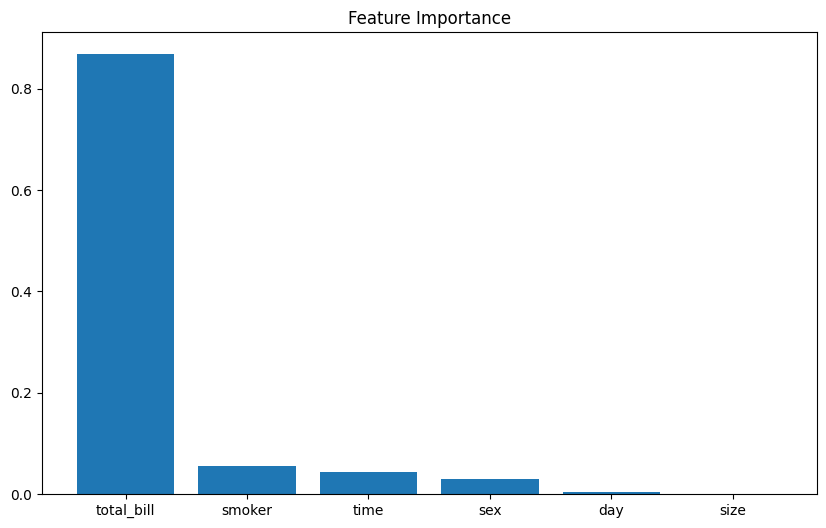

In [241]:
# Feature importance for the Decision tree model
feature_importances = tree_model.feature_importances_
features = x.columns
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), features[indices])
plt.show()




To visualize the target variable `tip` against each feature column, we can create pair plots or individual scatter plots for each feature.

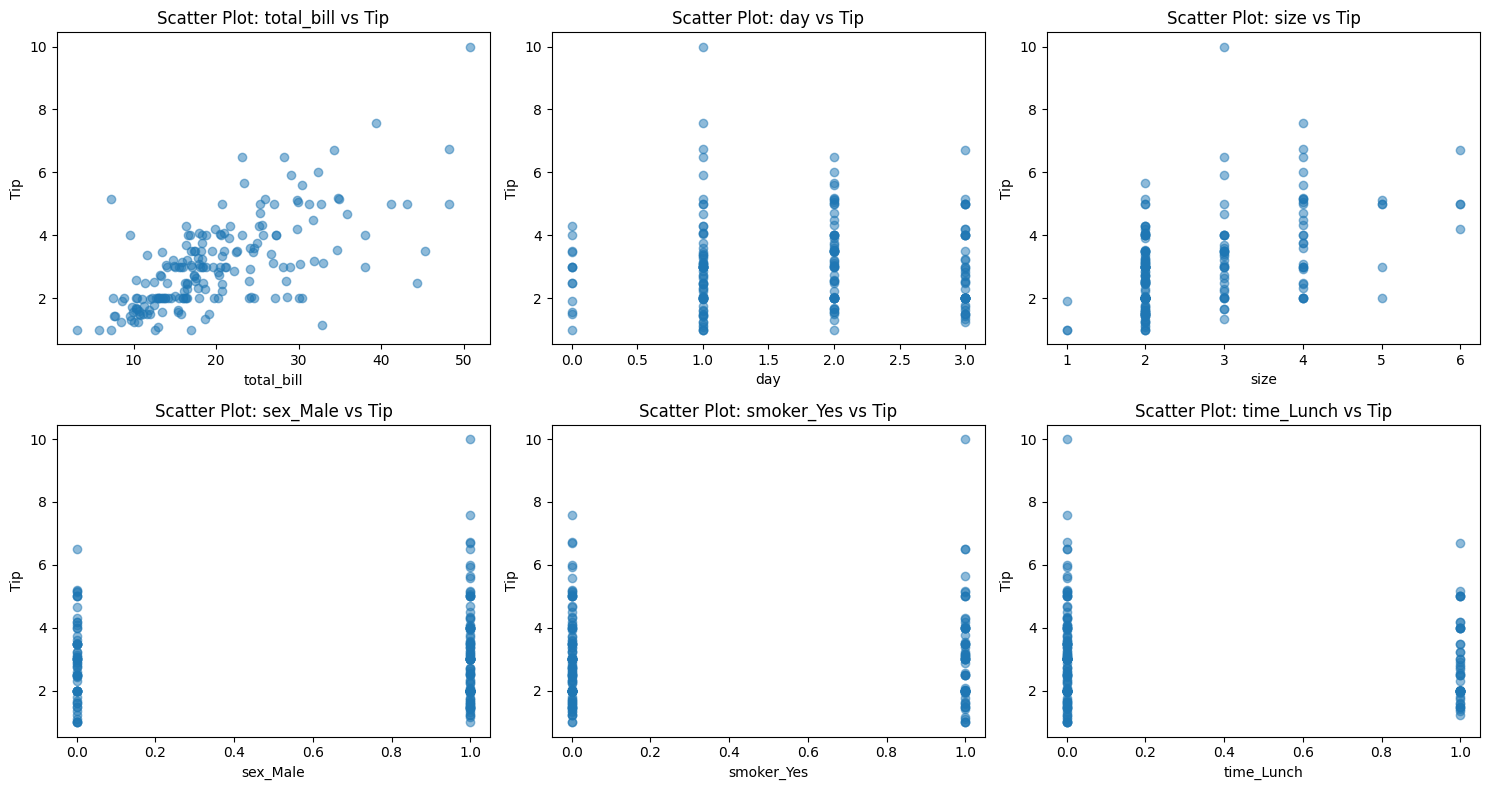

In [242]:
plt.figure(figsize=(15, 8))

for i, predictor in enumerate(x_train.columns, 1):
    plt.subplot(2, (len(x_train.columns) + 1) // 2, i)
    plt.scatter(x_train[predictor], y_train, alpha=0.5)
    plt.title(f'Scatter Plot: {predictor} vs Tip')
    plt.xlabel(predictor)
    plt.ylabel('Tip')

plt.tight_layout()
plt.show()


To create pair plots for the entire dataset, use Seaborn's `pairplot` function. This will display pairwise relationships between all numerical columns in your dataset, including the target variable if present.

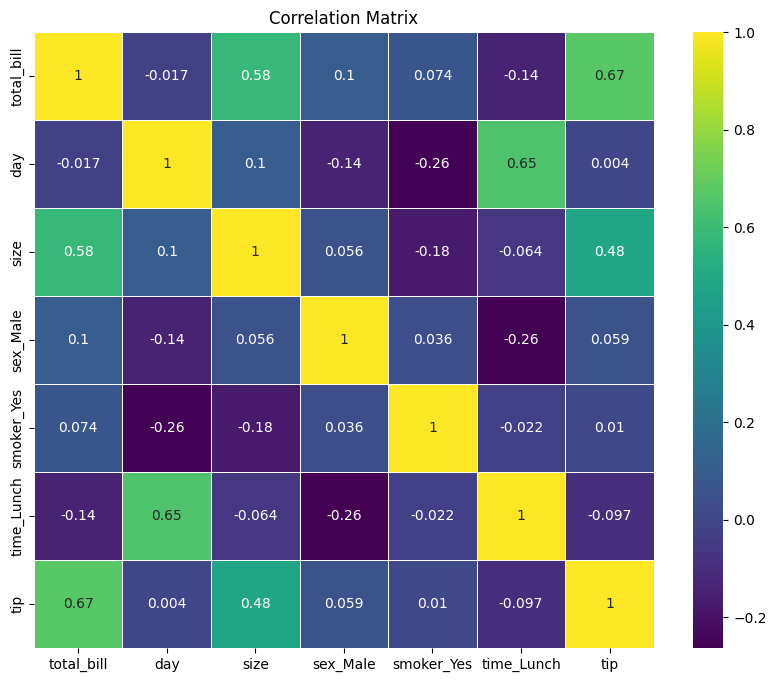

In [243]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation matrix plot
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



Let's create a heatmap to visualize the correlation matrix.

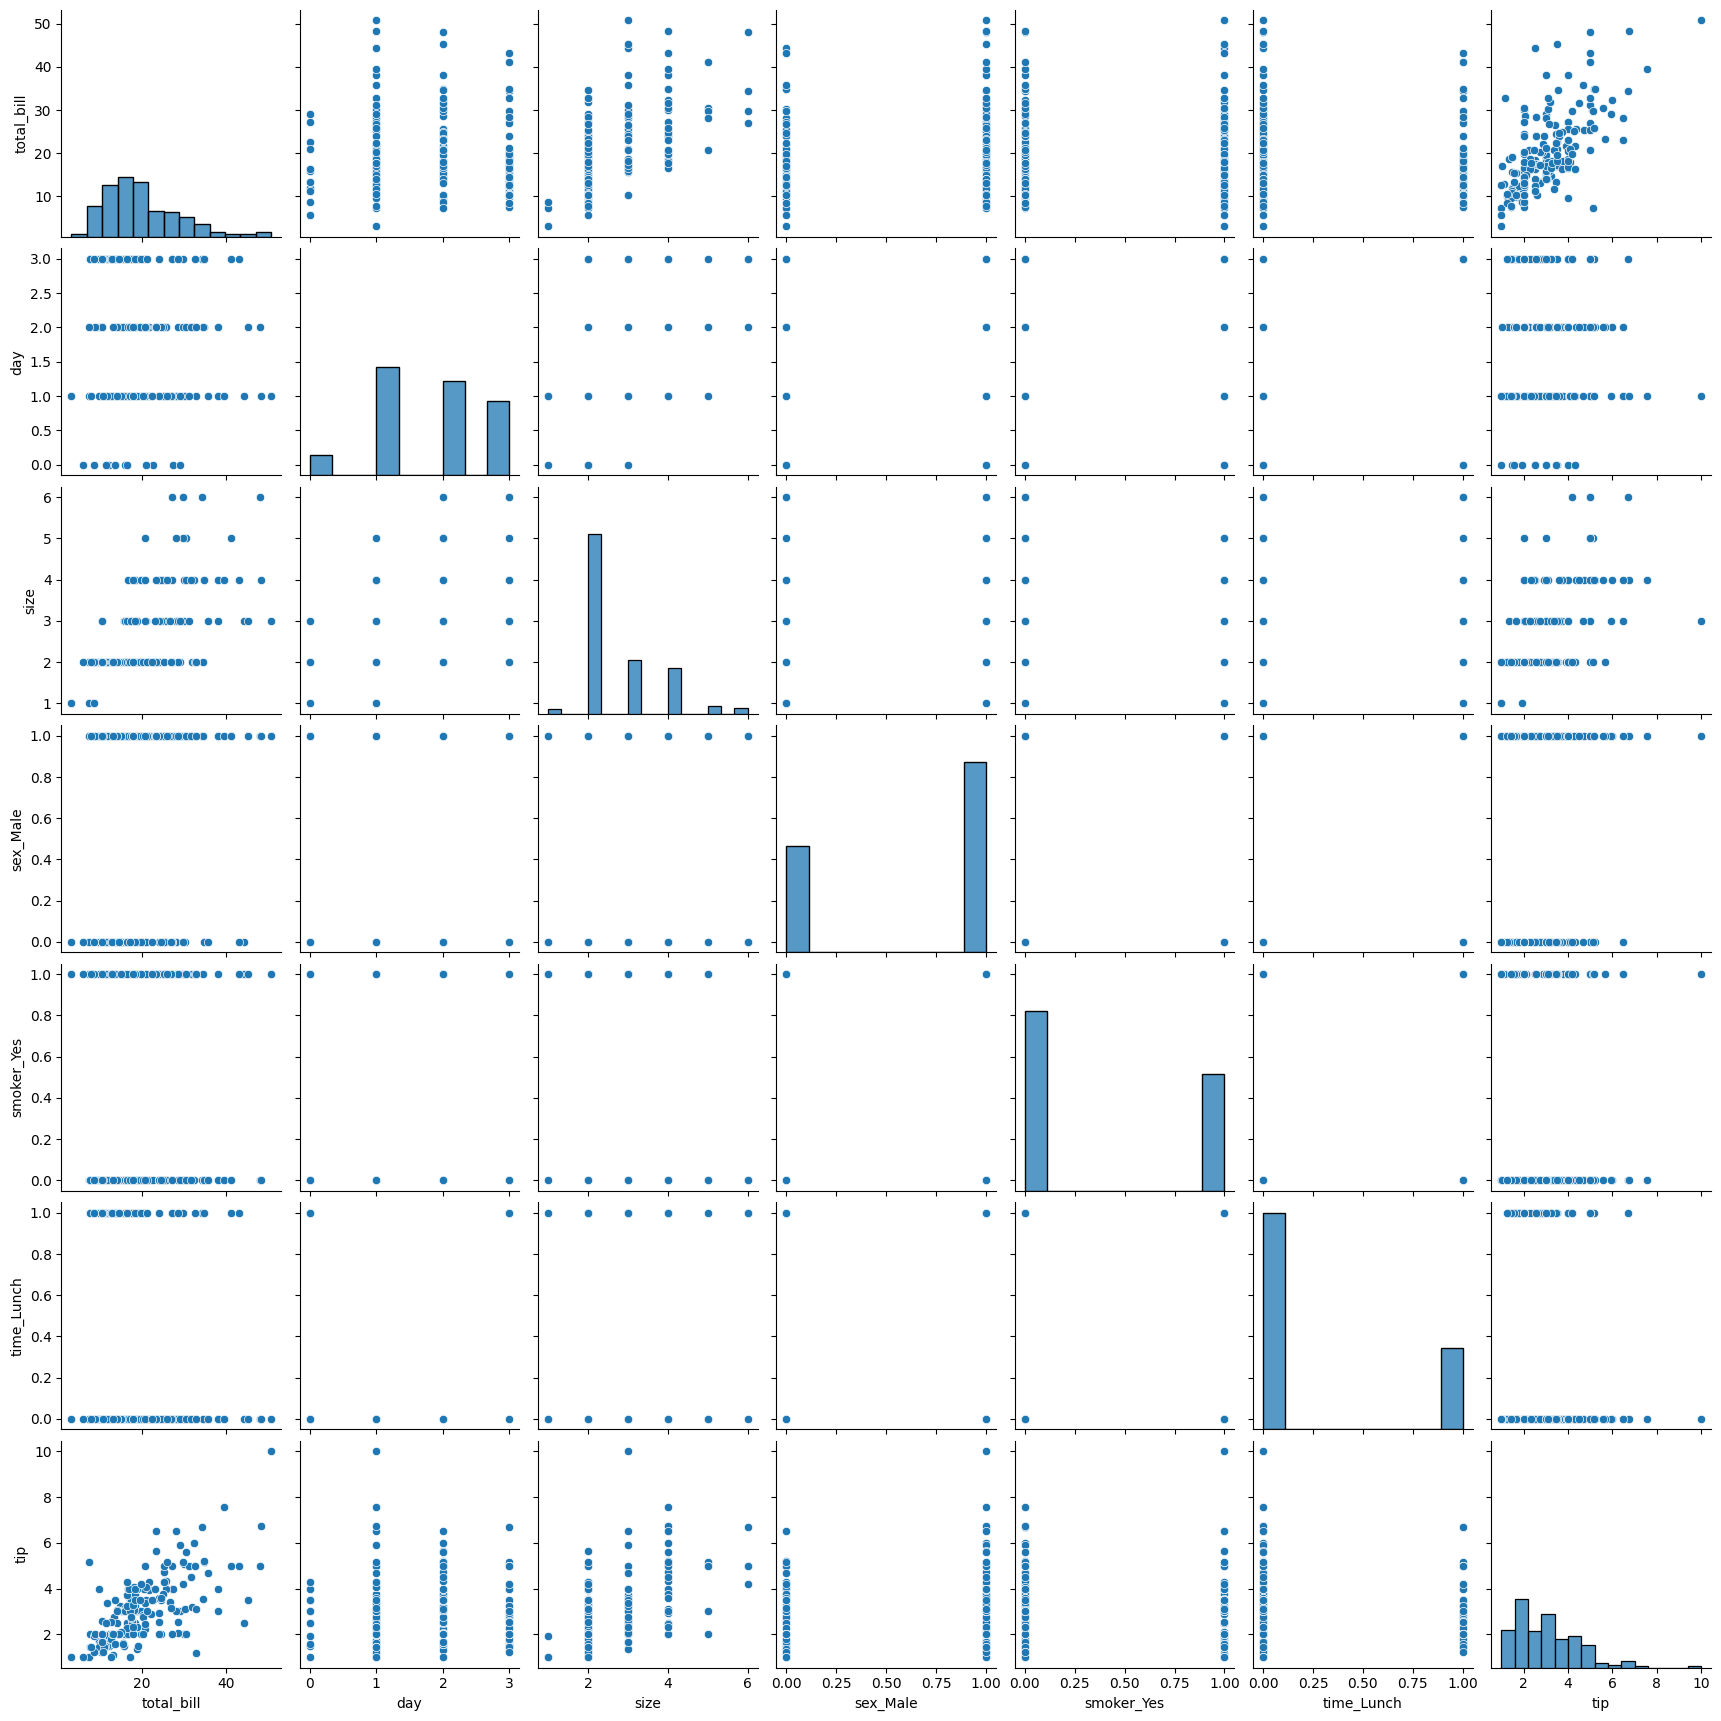

In [244]:
# Import required visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of training features
train_data = x_train.copy()

# Add target variable 'tip' to the dataset for visualization
train_data['tip'] = y_train

# Create pairplot to visualize relationships between all variables
sns.pairplot(train_data)

# Display the plot
plt.show()



Rainbow test

In [245]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Add constant for intercept
x_train_const = sm.add_constant(x_train)

# Fit an OLS model
model = sm.OLS(y_train, x_train_const).fit()

# Perform the Rainbow test
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f'Rainbow test statistic: {rainbow_stat}, p-value: {rainbow_p_value}')

# Interpretation
if rainbow_p_value > 0.05:
    print("No evidence against linearity (p-value > 0.05). The data may follow a linear trend.")
else:
    print("Evidence against linearity (p-value <= 0.05). The data may not follow a linear trend.")

Rainbow test statistic: 0.9218499487414654, p-value: 0.6540103310426213
No evidence against linearity (p-value > 0.05). The data may follow a linear trend.


Residual plots

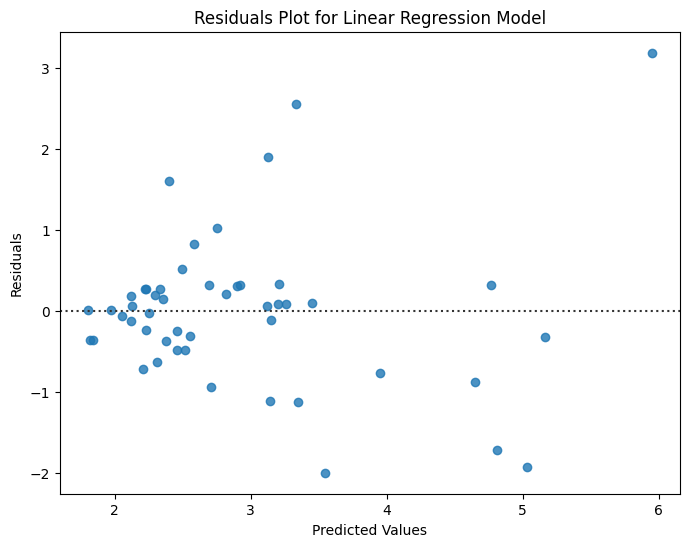

In [246]:
residuals = y_valid - ypred_linear

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=ypred_linear, y=residuals, line_kws={"color": "orange"})
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

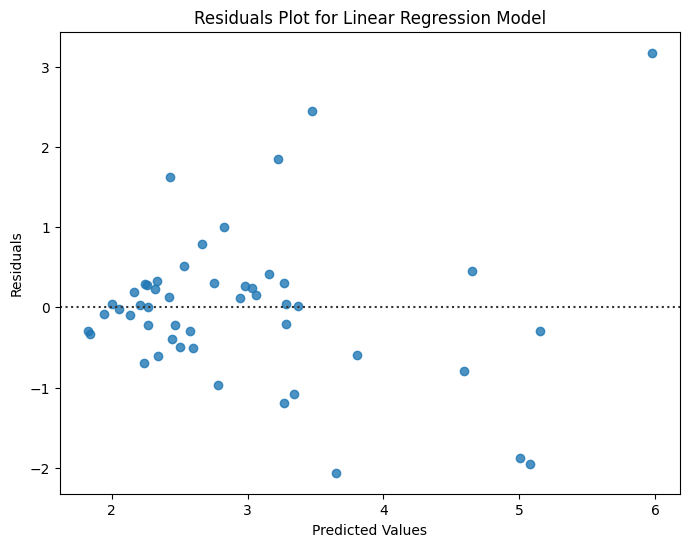

In [247]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (difference between actual and predicted values)
residuals = y_valid - y_pred_lasso

# Create residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_lasso, y=residuals, line_kws={"color": "orange"})

# Add title and labels
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Display the plot
plt.show()


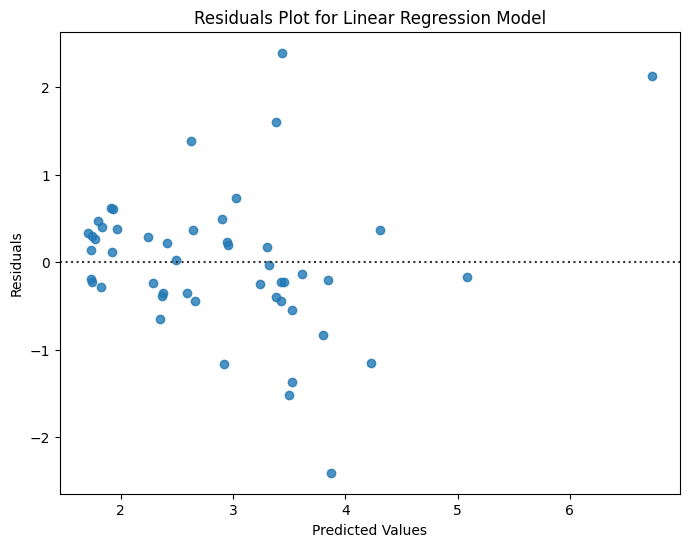

In [248]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (difference between actual and predicted values)
residuals = y_valid - y_pred_rf

# Create residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_rf, y=residuals, line_kws={"color": "blue"})

# Add title and labels
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Display the plot
plt.show()



In [249]:
#Since the dataset is relatively small with fewer data points, it's more suitable to use simpler models like linear models.